In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,root_mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
import joblib
import os


In [4]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize']

[6.4, 4.8]

In [5]:
caminho = '../data/StudentsPerformance.csv'

df = pd.read_csv(caminho)

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.info()
print(f'\nLinhas: {df.shape[0]} | Colunas: {df.shape[1]}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB

Linhas: 1000 | Colunas: 8


In [7]:
print('Valores nuloes por coluna: \n', df.isnull().sum())
print('\nLinhas duplicadas:', df.duplicated().sum())

Valores nuloes por coluna: 
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Linhas duplicadas: 0


In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


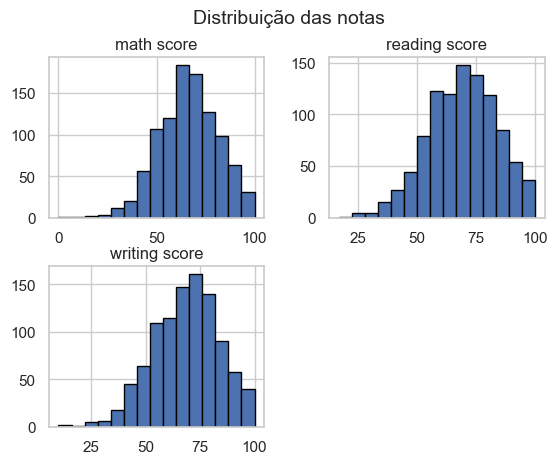

In [9]:
df[["math score", "reading score", "writing score"]].hist(bins=15, edgecolor='black')
plt.suptitle('Distribuição das notas', fontsize=14)
plt.show()

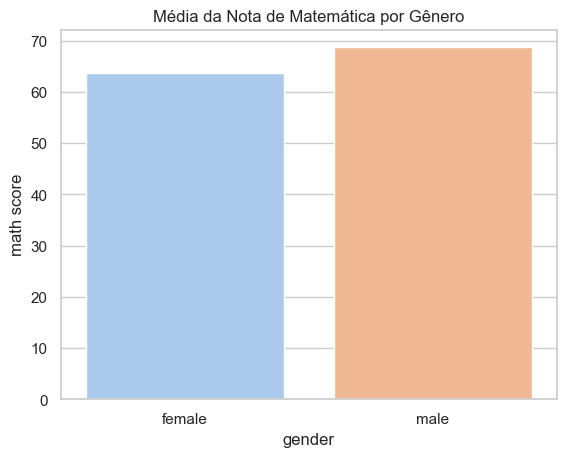

In [10]:
sns.barplot(
    x="gender",
    y="math score",
    hue="gender",
    data=df,
    errorbar=None,
    palette="pastel",
    legend=False
)
plt.title("Média da Nota de Matemática por Gênero")
plt.show()



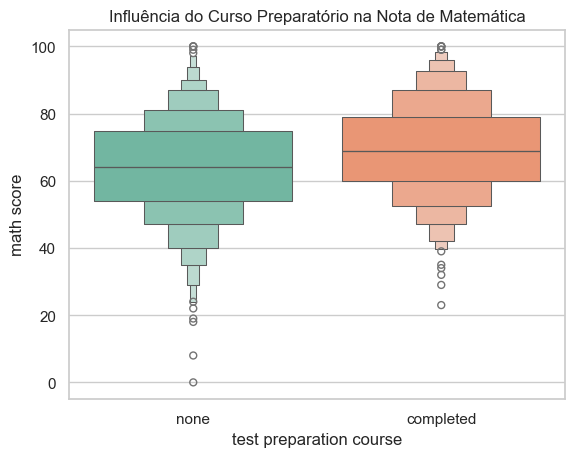

In [11]:
sns.boxenplot(
    x='test preparation course',
    y='math score',
    hue='test preparation course',
    data=df,
    palette='Set2',
    legend=False
)
plt.title('Influência do Curso Preparatório na Nota de Matemática')
plt.show()


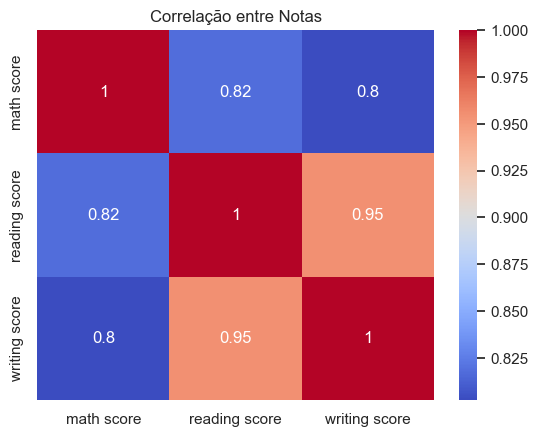

In [12]:
sns.heatmap(df[['math score','reading score', 'writing score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Notas')
plt.show()

Preparar Dados

In [13]:
y = df['math score']
x = df.drop(columns=['math score'])

x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [14]:
cat_cols = x.select_dtypes(include='object').columns
num_cols = x.select_dtypes(exclude=['object']).columns

print('Categóricas:', list(cat_cols))
print('Numéricas:', list(num_cols))

Categóricas: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
Numéricas: ['reading score', 'writing score']


In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols),
        ('num', StandardScaler(),num_cols)
    ]
)

In [16]:
pipeline = Pipeline(steps=[('preprocessor',preprocessor)])

In [18]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

print('Tamanho treino:', x_train.shape)
print('Tamanho teste:',x_test.shape)

Tamanho treino: (800, 7)
Tamanho teste: (200, 7)


In [19]:
x_train_transformed = pipeline.fit_transform(x_train)
x_test_transformed = pipeline.transform(x_test)

print('Formato final x_train: ', x_train_transformed.shape)
print('Formato final x_test', x_test_transformed.shape)

Formato final x_train:  (800, 14)
Formato final x_test (200, 14)


Treinamento do Modelo

In [38]:

baseline = DummyRegressor(strategy="mean")
baseline.fit(x_train, y_train)
y_pred_base = baseline.predict(x_test)

r2_base = r2_score(y_test, y_pred_base)
mae_base = mean_absolute_error(y_test, y_pred_base)
rmse_base = mean_squared_error(y_test, y_pred_base)


pipe_lr = Pipeline(steps=[
    ("preprocessor", preprocessor), 
    ("model", LinearRegression())
])

pipe_lr.fit(x_train, y_train)
y_pred = pipe_lr.predict(x_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print("[Regressão Linear]")
print(f"R²  : {r2:.3f}")
print(f"MAE : {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


[Regressão Linear]
R²  : 0.880
MAE : 4.21
RMSE: 29.10


In [39]:
comparacao = pd.DataFrame({
    'Modelo':['Baseline (média)', 'Regressão Linear'],
    'R²':[r2_base, r2],
    'MAE':[mae_base, mae],
    'RMSE':[rmse_base, rmse]
})
comparacao

,Modelo,R²,MAE,RMSE
0,Baseline (média),-0.017039,12.339850,247.484714
1,Regressão Linear,0.880433,4.214763,29.095170


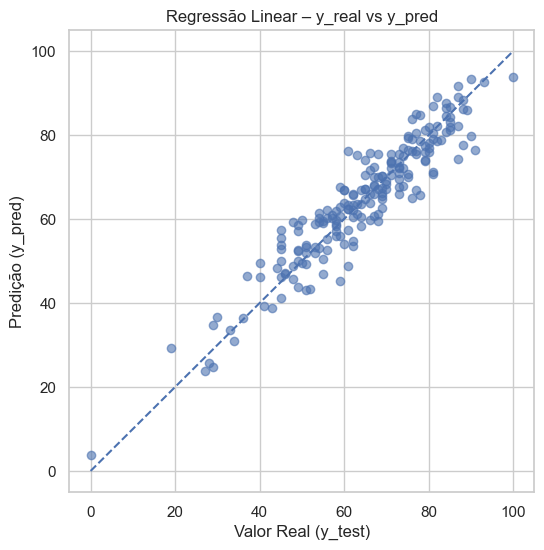

In [40]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred, alpha=0.6)
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, linestyle="--")
plt.xlabel("Valor Real (y_test)")
plt.ylabel("Predição (y_pred)")
plt.title("Regressão Linear – y_real vs y_pred")
plt.show()

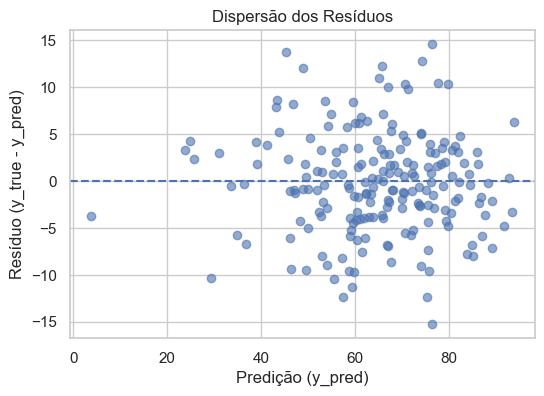

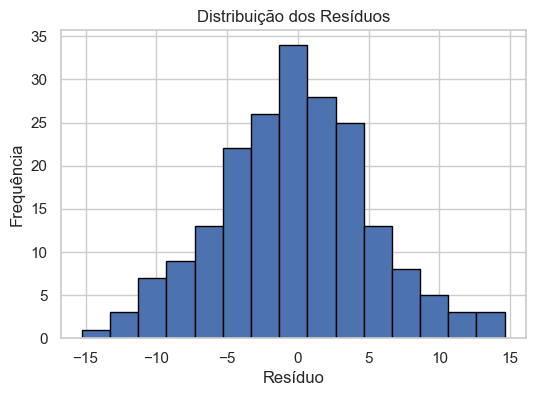

In [41]:
residuos = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuos, alpha=0.6)
plt.axhline(0, linestyle="--")
plt.xlabel("Predição (y_pred)")
plt.ylabel("Resíduo (y_true - y_pred)")
plt.title("Dispersão dos Resíduos")
plt.show()

plt.figure(figsize=(6,4))
plt.hist(residuos, bins=15, edgecolor="black")
plt.title("Distribuição dos Resíduos")
plt.xlabel("Resíduo")
plt.ylabel("Frequência")
plt.show()


In [47]:
scores = cross_val_score(pipe_lr, x, y, cv=5, scoring="r2")

print("R² (CV=5) por dobra:", np.round(scores, 3))
print("R² médio (CV=5):", scores.mean().round(3), "+/-", scores.std().round(3))

R² (CV=5) por dobra: [0.882 0.867 0.844 0.885 0.881]
R² médio (CV=5): 0.872 +/- 0.015


Comparação

In [52]:
modelos = {
    "Linear Regression": pipe_lr,
    "Decision Tree": Pipeline(steps=[("preprocessor", preprocessor), ("model", DecisionTreeRegressor(random_state=42))]),
    "Random Forest": Pipeline(steps=[("preprocessor", preprocessor), ("model", RandomForestRegressor(random_state=42))]),
    "KNN": Pipeline(steps=[("preprocessor", preprocessor), ("model", KNeighborsRegressor())]),
    "SVR": Pipeline(steps=[("preprocessor", preprocessor), ("model", SVR())])
}

resultados = []

for nome, modelo in modelos.items():
    modelo.fit(x_train, y_train)
    y_pred = modelo.predict(x_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    
    resultados.append([nome, r2, mae, rmse])

tabela_resultados = pd.DataFrame(resultados, columns=["Modelo", "R²", "MAE", "RMSE"]).sort_values(by="R²", ascending=False)
tabela_resultados.reset_index(drop=True, inplace=True)
tabela_resultados


,Modelo,R²,MAE,RMSE
0,Linear Regression,0.880433,4.214763,29.095170
1,Random Forest,0.849035,4.746676,36.735557
2,KNN,0.777305,5.703000,54.190200
3,Decision Tree,0.732636,6.390000,65.060000
4,SVR,0.713544,5.499555,69.705851


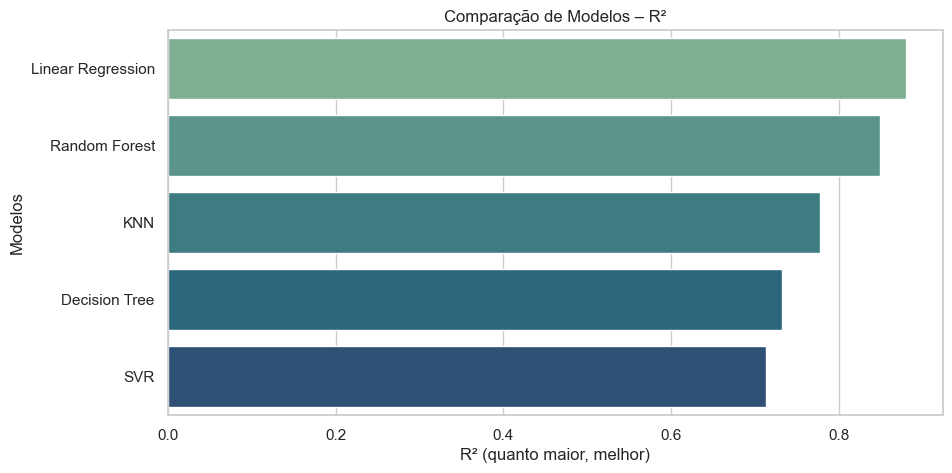

In [54]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x="R²",
    y="Modelo",
    hue="Modelo", 
    data=tabela_resultados,
    palette="crest",
    legend=False  
)
plt.title("Comparação de Modelos – R²")
plt.xlabel("R² (quanto maior, melhor)")
plt.ylabel("Modelos")
plt.show()


In [57]:
melhor_modelo_nome = tabela_resultados.iloc[0]["Modelo"]
melhor_modelo_nome

'Linear Regression'

In [58]:
pipelines = {
    "Linear Regression": Pipeline([("preprocessor", preprocessor), ("model", LinearRegression())]),
    "Decision Tree":     Pipeline([("preprocessor", preprocessor), ("model", DecisionTreeRegressor(random_state=42))]),
    "Random Forest":     Pipeline([("preprocessor", preprocessor), ("model", RandomForestRegressor(random_state=42))]),
    "KNN":               Pipeline([("preprocessor", preprocessor), ("model", KNeighborsRegressor())]),
    "SVR":               Pipeline([("preprocessor", preprocessor), ("model", SVR())]),
}


param_grids = {
    "Linear Regression": {
    },
    "Decision Tree": {
        "model__max_depth": [None, 5, 10, 20],
        "model__min_samples_split": [2, 5, 10],
        "model__min_samples_leaf": [1, 2, 4]
    },
    "Random Forest": {
        "model__n_estimators": [100, 300],
        "model__max_depth": [None, 10, 20],
        "model__min_samples_split": [2, 5],
        "model__min_samples_leaf": [1, 2]
    },
    "KNN": {
        "model__n_neighbors": [3, 5, 7, 9],
        "model__weights": ["uniform", "distance"],
        "model__p": [1, 2]
    },
    "SVR": {
        "model__kernel": ["rbf", "linear"],
        "model__C": [0.1, 1, 10],
        "model__epsilon": [0.05, 0.1, 0.2],
        "model__gamma": ["scale", "auto"]
    },
}

In [60]:
pipe_escolhido = pipelines[melhor_modelo_nome]
param_grid = param_grids[melhor_modelo_nome]

if len(param_grid) == 0:
    pipe_escolhido.fit(x_train, y_train)
    best_estimator_ = pipe_escolhido
    best_params_ = {}
    best_cv_score_ = None
else:
    grid = GridSearchCV(
        estimator=pipe_escolhido,
        param_grid=param_grid,
        scoring="r2",
        cv=5,
        n_jobs=-1,
        verbose=0
    )
    grid.fit(x_train, y_train)
    best_estimator_ = grid.best_estimator_
    best_params_ = grid.best_params_
    best_cv_score_ = grid.best_score_

print("Melhor modelo:", melhor_modelo_nome)
print("Melhores hiperparâmetros:", best_params_)
print("R² médio (CV=5):", None if best_cv_score_ is None else round(best_cv_score_, 3))

Melhor modelo: Linear Regression
Melhores hiperparâmetros: {}
R² médio (CV=5): None


In [63]:
y_pred_best = best_estimator_.predict(x_test)

r2  = r2_score(y_test, y_pred_best)
mae = mean_absolute_error(y_test, y_pred_best)
rmse = root_mean_squared_error(y_test, y_pred_best)

print("[Teste] Resultados do melhor modelo")
print(f"R²  : {r2:.3f}")
print(f"MAE : {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


[Teste] Resultados do melhor modelo
R²  : 0.880
MAE : 4.21
RMSE: 5.39


In [72]:
def get_feature_names(preprocessor, x_fit):
    cat_cols = preprocessor.transformers_[0][2]
    num_cols = preprocessor.transformers_[1][2]

    ohe = preprocessor.named_transformers_["cat"]
    ohe_names = ohe.get_feature_names_out(cat_cols)

    all_features = np.concatenate([ohe_names, num_cols])
    return all_features

preproc = best_estimator_.named_steps["preprocessor"]
model   = best_estimator_.named_steps["model"]

# Pegar nomes após transformação
feature_names = get_feature_names(preproc, x_train)


if hasattr(model, "feature_importances_"):
    importancias = model.feature_importances_
else:
    r = permutation_importance(best_estimator_, x_test, y_test,
                               n_repeats=10, random_state=42,
                               n_jobs=-1, scoring="r2")
    importancias = r.importances_mean

min_len = min(len(feature_names), len(importancias))
feature_names = feature_names[:min_len]
importancias = importancias[:min_len]

imp_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importancias
}).sort_values("importance", ascending=False).head(15)

imp_df

,feature,importance
6,parental level of education_high school,1.006902
0,gender_male,0.366539
5,parental level of education_bachelor's degree,0.100741
4,race/ethnicity_group E,0.029463
3,race/ethnicity_group D,0.015226
1,race/ethnicity_group B,0.013895
2,race/ethnicity_group C,0.002253


In [84]:

os.makedirs("models", exist_ok=True)

# salva o pipeline completo (pré-processamento + modelo)
joblib.dump(best_estimator_, "models/melhor_modelo.joblib")

print("✅ Modelo salvo em: models/melhor_modelo.joblib")


✅ Modelo salvo em: models/melhor_modelo.joblib
